In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
file_path = "Dataset .csv"
df = pd.read_csv(file_path)

In [6]:
# Display first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
top_cuisines = df['Cuisines'].value_counts().head(3)
top_cuisine_percentage = (top_cuisines / len(df)) * 100
print("Top 3 Cuisines:\n", top_cuisines)
print("\nPercentage of Restaurants Serving Each:\n", top_cuisine_percentage)

Top 3 Cuisines:
 Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

Percentage of Restaurants Serving Each:
 Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


In [8]:
### Task 2: City Analysis
city_counts = df['City'].value_counts()
top_city = city_counts.idxmax()
city_avg_ratings = df.groupby('City')['Aggregate rating'].mean()
highest_rated_city = city_avg_ratings.idxmax()
print(f"\nCity with Most Restaurants: {top_city} ({city_counts[top_city]} restaurants)")
print("\nCity with Highest Average Rating:", highest_rated_city, f"({city_avg_ratings.max():.2f})")


City with Most Restaurants: New Delhi (5473 restaurants)

City with Highest Average Rating: Inner City (4.90)


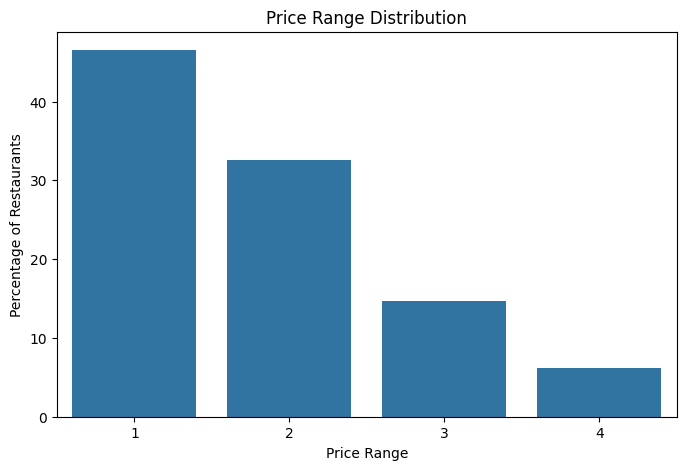


Price Range Percentage:
 Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64


In [10]:
### Task 3: Price Range Distribution
price_counts = df['Price range'].value_counts(normalize=True) * 100
plt.figure(figsize=(8,5))
sns.barplot(x=price_counts.index, y=price_counts.values)
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.title("Price Range Distribution")
plt.show()
print("\nPrice Range Percentage:\n", price_counts)

In [11]:
### Task 4: Online Delivery
online_delivery_counts = df['Has Online delivery'].value_counts(normalize=True) * 100
avg_rating_online = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
avg_rating_offline = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()
print("\nOnline Delivery Percentage:\n", online_delivery_counts)
print(f"\nAvg Rating - Online Delivery: {avg_rating_online:.2f}")
print(f"Avg Rating - No Online Delivery: {avg_rating_offline:.2f}")


Online Delivery Percentage:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

Avg Rating - Online Delivery: 3.25
Avg Rating - No Online Delivery: 2.47
